# Simple Linear Regression

We use `simple linear regression` where we want to understand the nature of the linear relationship between two independent variables.

## The Model

We assume that having more friends causes people to spend more time on communicating with them. Build a model describing this relationship.

<img src="images/simplel_linear_regression1.png" alt="" style="width: 600px;"/>

In [2]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

How do we choose `alpha` and `beta`? Any choice of `alpha` and `beta` gives us a predicted output for each input `x_i`. Since we know the actual output `y_i` we can compute the `error` for each pair:

In [5]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    '''the error from predicting beta * x_i + alpha when the actual value is y_i'''
    return y_i - predict(alpha, beta, x_i)

What we’d really like to know is the `total error` over the entire data set. But we don’t want to just add the `errors` — if the prediction for `x_1` is too high and the prediction for `x_2` is too low, the errors may just cancel out. So instead we add up the `squared errors`:

In [6]:
from scratch.linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i)**2
              for x_i, y_i in zip(x, y))

The `least squares solution` is to choose the `alpha` and `beta` that make `sum_of_sqerrors` as small as possible. The error-minimizing `alpha` and `beta` are given by:

In [9]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    '''given training values for x and y, find the least-squares values of alpha and beta'''
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [10]:
# Test
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]
x, y

([-100,
  -90,
  -80,
  -70,
  -60,
  -50,
  -40,
  -30,
  -20,
  -10,
  0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100],
 [-305,
  -275,
  -245,
  -215,
  -185,
  -155,
  -125,
  -95,
  -65,
  -35,
  -5,
  25,
  55,
  85,
  115,
  145,
  175,
  205,
  235,
  265,
  295])

In [12]:
# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

In [15]:
from scratch.statistics import num_friends_good, daily_minutes_good

num_friends_good[:10], daily_minutes_good[:10]

([49, 41, 40, 25, 21, 21, 19, 19, 18, 18],
 [68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76])

In [16]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
alpha, beta

(22.94755241346903, 0.903865945605865)

In [90]:
from typing import List

def predict_y(xs: List[float], alpha: float, beta: float) -> List[float]:
    return [beta*x+alpha for x in xs]

In [93]:
# Plot the data

import matplotlib.pyplot as plt
%matplotlib inline

def plot_slr(xs, ys, xlabel, ylabel):
    
    alpha, beta = least_squares_fit(xs, ys)
    y = predict_y(xs, alpha, beta)
        
    plt.figure(figsize=(10,8))

    label = f"y = {beta:.2f}*x + {alpha:.2f}"
    plt.scatter(xs, ys)
    plt.plot(xs, y, '-r', label=label)

    plt.title("Simple Linear Regression Model")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=9)
    plt.savefig('images/slr.png')
    plt.show()

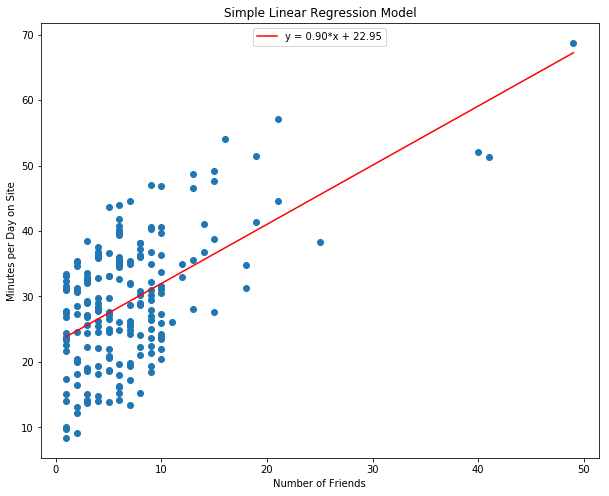

In [94]:
plot_slr(num_friends_good, daily_minutes_good, "Number of Friends", "Minutes per Day on Site")

This gives values of `alpha` = 22.95 and `beta` = 0.903. So our model says that `we expect a user with n friends to spend 22.95 + n * 0.903 minutes on communicating each day`. That is, we predict that a user with no friends would still spend about 23 minutes a day on the site. And for each additional friend, we expect a user to spend almost a minute more on the site each day.

## R-squared (Coefficient of Determination)
Measures the fraction of the total variation in the dependent variable that is captured by the model.

In [46]:
from scratch.statistics import de_mean

def total_sum_of_squares(y):
    '''the total squared variation of y_i's from their mean''' 
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    '''the fraction of variation in y captured by the model, which equals
        1 - the fraction of variation in y not captured by the model'''
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))

r_squared(alpha, beta, num_friends_good, daily_minutes_good) # 0.329

0.3291078377836305

R-squared of 0 indicates a model that performs no better than just predicting the mean. Our model is only a sort of okay at fitting the data, and there are clearly other factors at play.

Linear regression assumes normality for the residual errors `epsilon`, which represent variation in `y` which is not explained by the predictors.

In [84]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
errors = [error(alpha, beta, x_i, y_i) for (x_i, y_i) in zip(num_friends_good, daily_minutes_good)]
errors[:10]

[1.533016251843577,
 -8.756056183309497,
 -7.022190237703626,
 -7.184201053615652,
 2.6112627288078087,
 15.201262728807812,
 11.278994620019539,
 1.298994620019542,
 -7.997139434374603,
 -4.457139434374604]

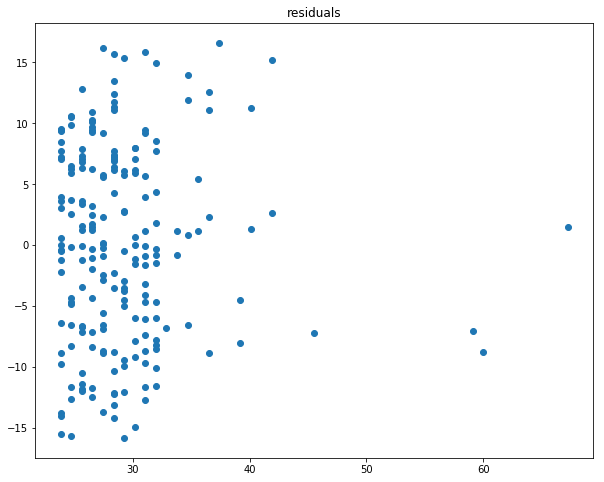

In [103]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
predicted_y = predict_y(num_friends_good, alpha, beta)

plt.figure(figsize=(10,8))
plt.scatter(x=predicted_y, y=errors)
plt.title('residuals')
plt.savefig('images/slr2.png')
plt.plot();

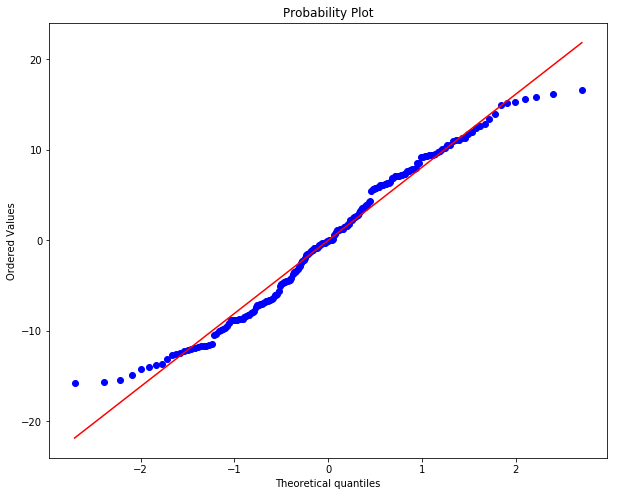

In [105]:
# Residuals should have normal distribution, it can be verified using QQ-plot
from scipy.stats import probplot

plt.figure(figsize=(10,8))
probplot(errors, plot=plt)
plt.savefig('images/slr3.png')
plt.show();

The probability plot looks reasonably normal.

## Using Gradient Descent !!! not working
If we write `theta = [alpha, beta]`, we can solve the problem using `gradient descent`:

In [64]:
import random
import tqdm
from scratch.gradient_descent import gradient_step

num_epochs = 10_000
random.seed(0)

# choose random value to start
guess = [random.random(), random.random()]

learning_rate = 0.00001

In [65]:
with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess
        
        # partial derivative of loss with respect to alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                    for x_i, y_i in zip(num_friends_good, daily_minutes_good))
        
        # partial derivative of loss with respect to beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                    for x_i, y_i in zip(num_friends_good, daily_minutes_good))
        
        # compiute loss to stick in the tqdm description
        #loss = sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good)
        t.set_description(f"loss: {loss:.3f}")
                          
        # update the guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

loss: inf: 100%|██████████| 10000/10000 [00:11<00:00, 900.03it/s]


In [66]:
alpha, beta = guess
alpha, beta

(-inf, -inf)